# Finals Plots for the Paper

In [1]:
# some magic so that the notebook will reload external python modules;
# see https://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

In [2]:
import os
import subprocess
import sys
import numpy as np
import matplotlib.pyplot as plt
import string
from copy import copy
import gc
import glob
import json
import string
import math
import pandas as pd
import scienceplots
%matplotlib inline

import cv2
import torch

In [3]:
sys.path.append(os.path.abspath('..'))

In [4]:
from data_processing.video_utils import seconds_to_hhmmss
from analyse_utils import get_speaker_df, get_word_frequencies, draw_word_cloud, aggregate_errors, print_most_frequent_errors

In [5]:
def process_text(text):
    punctuation = string.punctuation.replace("'", "")
    text = text.translate(str.maketrans('', '', punctuation))
    text = text.upper()
    return text

## For Deaf Speakers

In [6]:
data_dir = "/ssd_scratch/cvit/vanshg/datasets/deaf-youtube"
deaf_speakers = ['realdeafdreamer', 'cochlear_kaz', 'benny', 'mia_sandra']
deaf_df_list = []

for speaker in deaf_speakers:
    # speaker = "benny"
    speaker_dir = os.path.join(data_dir, f"{speaker}")
    clips_dir = os.path.join(speaker_dir, f"website_sentence_clips")

    clip_files = glob.glob(os.path.join(clips_dir, "*/clips.json"))
    clip_files = sorted(clip_files)
    print(f"{len(clip_files) = }")
    print(f"{clip_files = }")

    speaker_df = get_speaker_df(clip_files)
    speaker_reduced_labelfile = os.path.join(speaker_dir, "all_reduced_labels.txt")
    selected_video_names = []

    with open(speaker_reduced_labelfile) as file:
        for line in file.readlines():
            video_path = line.split()[0]
            video_name = os.path.basename(video_path).split('.')[0]
            selected_video_names.append(video_name)

    speaker_df = speaker_df[speaker_df['video_name'].isin(selected_video_names)]
    deaf_df_list.append(speaker_df)

deafs_df = pd.concat(deaf_df_list, ignore_index=True)
deafs_df

len(clip_files) = 39
clip_files = ['/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/realdeafdreamer/website_sentence_clips/15b1sEDtVCs/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/realdeafdreamer/website_sentence_clips/2rePWvYihK4/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/realdeafdreamer/website_sentence_clips/490UhDtuT-0/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/realdeafdreamer/website_sentence_clips/6ojYIVNF2hA/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/realdeafdreamer/website_sentence_clips/7_UnJ8JaT1M/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/realdeafdreamer/website_sentence_clips/96LyQtEkNtk/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/realdeafdreamer/website_sentence_clips/A0Ao-YsQ4U8/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/realdeafdreamer/website_sentence_clips/AyEnHte0yzU/clips.json', '/ssd_scratch/cvit/vanshg/datasets/deaf-youtube/realdeafdreamer/websi

,video_path,video_name,video_id,status,start,end,transcript,processed_text,num_words,num_seconds
0,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,15b1sEDtVCs_1_2_2,15b1sEDtVCs,Accepted,13.5,19.0,"But, before when I first started learning ASL abc",BUT BEFORE WHEN I FIRST STARTED LEARNING ASL ABC,9,5.5
1,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,15b1sEDtVCs_1_3_3,15b1sEDtVCs,Accepted,19.2,25.8,I realised I really struggled with how to reme...,I REALISED I REALLY STRUGGLED WITH HOW TO REME...,13,6.6
2,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,15b1sEDtVCs_1_5_5,15b1sEDtVCs,Accepted,29.7,34.7,"Until my boyfriend John asked me, do you know ...",UNTIL MY BOYFRIEND JOHN ASKED ME DO YOU KNOW A...,11,5.0
3,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,15b1sEDtVCs_1_8_8,15b1sEDtVCs,Accepted,45.9,47.8,"the funny thing is,",THE FUNNY THING IS,4,1.9
4,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,15b1sEDtVCs_1_9_9,15b1sEDtVCs,Accepted,48.7,54.8,"finally, it clicked I've found ASL abc really ...",FINALLY IT CLICKED I'VE FOUND ASL ABC REALLY EASY,9,6.1
...,...,...,...,...,...,...,...,...,...,...
3857,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,uXmSels6cno_14_64_39,uXmSels6cno,Accepted,332.4,338.0,"IF YOU GUYS REALLY LIKE THIS VIDEO, THEN I'LL ...",IF YOU GUYS REALLY LIKE THIS VIDEO THEN I'LL D...,12,5.6
3858,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,uXmSels6cno_14_66_41,uXmSels6cno,Accepted,352.7,354.0,HIT SUBSCRIBE,HIT SUBSCRIBE,2,1.3
3859,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,uXmSels6cno_14_67_42,uXmSels6cno,Accepted,354.7,358.2,AND GIVE THIS VIDEO THOMBS UP !,AND GIVE THIS VIDEO THOMBS UP,7,3.5
3860,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,uXmSels6cno_14_68_43,uXmSels6cno,Accepted,359.0,361.1,HOPE YOU ENJOYED,HOPE YOU ENJOYED,3,2.1


In [7]:
speaker_reduced_labelfile = os.path.join(speaker_dir, "all_reduced_labels.txt")
selected_video_names = []

with open(speaker_reduced_labelfile) as file:
    for line in file.readlines():
        video_path = line.split()[0]
        video_name = os.path.basename(video_path).split('.')[0]
        selected_video_names.append(video_name)

print(f"Number of Selected Video Names: {len(selected_video_names)}")

Number of Selected Video Names: 1419


In [13]:
print(selected_video_names)

['dyb71EMatR0_0_9_9', 'dyb71EMatR0_0_6_6', 'vcqcMYsL3P8_1_62_62', 'VMoimi4ci00_10_39_37', 'JaB9BT09nSE_52_88_71', 'XlEO7pWAc84_3_13_12', 'W1hE8AL2Jx8_12_71_68', 'dyb71EMatR0_12_79_77', 'VMoimi4ci00_3_19_18', 'dyb71EMatR0_16_107_104', 'RcFck_p-jOw_3_15_15', 'gYMy4Aioa5s_22_47_36', 'RcFck_p-jOw_3_24_24', 'gYMy4Aioa5s_62_116_87', 'dyb71EMatR0_16_105_102', 'vativsC3YgU_5_24_21', 'XlEO7pWAc84_8_52_48', '5R1wKqS3sA8_0_3_3', 'hPbPzlv1ojM_13_37_36', 'gYMy4Aioa5s_123_203_140', 'gYMy4Aioa5s_0_1_1', 'gYMy4Aioa5s_72_146_111', 'RcFck_p-jOw_39_80_61', 'gYMy4Aioa5s_77_153_115', 'vativsC3YgU_28_89_75', 'RcFck_p-jOw_25_57_47', 'XlEO7pWAc84_9_105_100', 'vativsC3YgU_2_10_8', 'VMoimi4ci00_40_108_101', 'RcFck_p-jOw_79_116_82', 'dyb71EMatR0_15_98_95', 'vcqcMYsL3P8_1_36_36', 'VMoimi4ci00_27_80_73', 'XlEO7pWAc84_6_32_29', 'W1hE8AL2Jx8_0_3_3', '5R1wKqS3sA8_9_63_57', 'dyb71EMatR0_4_33_33', 'gYMy4Aioa5s_32_67_51', 'dyb71EMatR0_3_22_22', 'gYMy4Aioa5s_69_137_104', 'vcqcMYsL3P8_1_51_51', 'W1hE8AL2Jx8_12_79_76', 'gY

In [15]:
speaker_df = speaker_df[speaker_df['video_name'].isin(selected_video_names)]
speaker_df

,video_path,video_name,video_id,status,start,end,transcript,processed_text,num_words,num_seconds
2,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,5R1wKqS3sA8_0_2_2,5R1wKqS3sA8,Accepted,9.7,15.0,"Because I bought a new camera, this was on sal...",BECAUSE I BOUGHT A NEW CAMERA THIS WAS ON SALE...,13,5.3
3,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,5R1wKqS3sA8_0_3_3,5R1wKqS3sA8,Accepted,14.9,21.8,"This my opportunity to grab the offer, so yes,...",THIS MY OPPORTUNITY TO GRAB THE OFFER SO YES N...,17,6.9
4,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,5R1wKqS3sA8_0_4_4,5R1wKqS3sA8,Accepted,22.0,28.0,I'm so fallen in love with this camera because...,I'M SO FALLEN IN LOVE WITH THIS CAMERA BECAUSE...,15,6.0
5,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,5R1wKqS3sA8_0_5_5,5R1wKqS3sA8,Accepted,28.8,30.8,I'm really excited to use this camera.,I'M REALLY EXCITED TO USE THIS CAMERA,7,2.0
6,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,5R1wKqS3sA8_0_6_6,5R1wKqS3sA8,Accepted,30.7,35.4,"So today the video, I will be doing 15 facts a...",SO TODAY THE VIDEO I WILL BE DOING 15 FACTS AB...,12,4.7
...,...,...,...,...,...,...,...,...,...,...
1094,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,vcqcMYsL3P8_2_95_94,vcqcMYsL3P8,Accepted,636.6,645.2,So when three weeks finished and the hotel off...,SO WHEN THREE WEEKS FINISHED AND THE HOTEL OFF...,15,8.6
1095,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,vcqcMYsL3P8_2_96_95,vcqcMYsL3P8,Accepted,645.1,653.2,"Well, I'm really happy because it is the thing...",WELL I'M REALLY HAPPY BECAUSE IT IS THE THING ...,16,8.1
1098,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,vcqcMYsL3P8_2_99_98,vcqcMYsL3P8,Accepted,665.5,667.6,I think that's it the video.,I THINK THAT'S IT THE VIDEO,6,2.1
1100,/ssd_scratch/cvit/vanshg/datasets/deaf-youtube...,vcqcMYsL3P8_2_101_100,vcqcMYsL3P8,Accepted,672.4,678.3,I hope you ate lot of chocolate because you de...,I HOPE YOU ATE LOT OF CHOCOLATE BECAUSE YOU DE...,13,5.9


Total Duration: 03:53:04.409
Durations, Min: 0.39999999999997726 | Max: 19.100000000000023 | Mean: 3.62102770585189
Length, Min: 1 | Max: 55 | Mean: 7.922320041429312


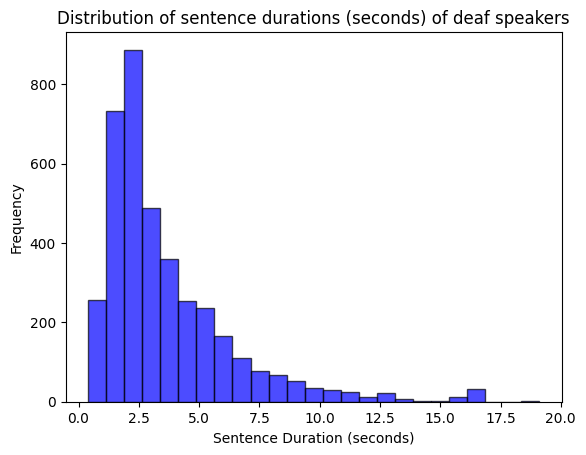

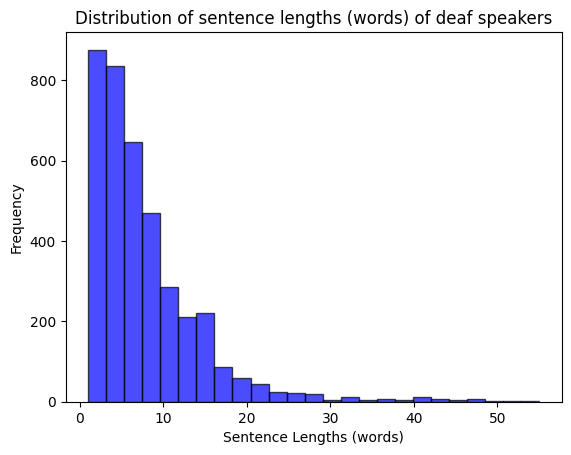

In [8]:
sentence_durations = deafs_df['num_seconds'].to_numpy()
sentence_lengths = deafs_df['num_words'].to_numpy()
print(f"Total Duration: {seconds_to_hhmmss(sentence_durations.sum())}")
print(f"Durations, Min: {sentence_durations.min()} | Max: {sentence_durations.max()} | Mean: {sentence_durations.mean()}")
print(f"Length, Min: {sentence_lengths.min()} | Max: {sentence_lengths.max()} | Mean: {sentence_lengths.mean()}")


# plt.style.use(['science', 'iee'])
plt.hist(sentence_durations, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of sentence durations (seconds) of deaf speakers")
plt.xlabel('Sentence Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

plt.hist(sentence_lengths, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of sentence lengths (words) of deaf speakers")
plt.xlabel(f"Sentence Lengths (words)")
plt.ylabel(f"Frequency")
plt.show()

## Accented Speaker Distributions

In [10]:
data_dir = "/ssd_scratch/cvit/vanshg/datasets/accented_speakers"
accented_speakers = ['jack', 'emily_canham', 'riyadh', 'diane_jennings', 'daniel_howell']
accented_df_list = []

for speaker in accented_speakers:
    # speaker = "benny"
    speaker_dir = os.path.join(data_dir, f"{speaker}")
    clips_dir = os.path.join(speaker_dir, f"sentence_clips")

    clip_files = glob.glob(os.path.join(clips_dir, "*/clips.json"))
    clip_files = sorted(clip_files)
    print(f"{len(clip_files) = }")
    print(f"{clip_files = }")

    speaker_df = get_speaker_df(clip_files)
    speaker_reduced_labelfile = os.path.join(speaker_dir, "all_reduced_labels.txt")
    selected_video_names = []

    with open(speaker_reduced_labelfile) as file:
        for line in file.readlines():
            video_path = line.split()[0]
            video_name = os.path.basename(video_path).split('.')[0]
            selected_video_names.append(video_name)

    speaker_df = speaker_df[speaker_df['video_name'].isin(selected_video_names)]
    accented_df_list.append(speaker_df)

accented_df = pd.concat(accented_df_list, ignore_index=True)
accented_df

len(clip_files) = 7
clip_files = ['/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/23su4pTJ_XY/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/426D8qmAW9U/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/4cv3lIvnpiI/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/58l9hcyGsGI/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/7XlHCoEJenE/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/ETWbMaxGmbA/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/jack/sentence_clips/JbkdvIauRYM/clips.json']
len(clip_files) = 3
clip_files = ['/ssd_scratch/cvit/vanshg/datasets/accented_speakers/emily_canham/sentence_clips/Yc1Ykz8QL5g/clips.json', '/ssd_scratch/cvit/vanshg/datasets/accented_speakers/emily_canham/sentence_clips/h8itGJ0GvG0/clips.json', '/ssd_scratch/cvit/vanshg/datasets

,video_path,video_name,video_id,status,start,end,transcript,processed_text,num_words,num_seconds
0,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,23su4pTJ_XY_0_4_4,23su4pTJ_XY,None,21.5,35.9,"In regards to what it is, I've kind of been a...",IN REGARDS TO WHAT IT IS I'VE KIND OF BEEN AT...,63,14.4
1,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,23su4pTJ_XY_2_5_6,23su4pTJ_XY,None,44.5,45.3,on this channel?,ON THIS CHANNEL,3,0.8
2,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,23su4pTJ_XY_2_6_7,23su4pTJ_XY,None,45.7,49.8,I started them six years ago at this point.,I STARTED THEM SIX YEARS AGO AT THIS POINT,9,4.1
3,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,23su4pTJ_XY_2_7_8,23su4pTJ_XY,None,49.8,65.2,2016 was the first time I ever did anything wi...,2016 WAS THE FIRST TIME I EVER DID ANYTHING WI...,56,15.4
4,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,23su4pTJ_XY_2_8_9,23su4pTJ_XY,None,65.4,69.0,Remember that short film I did with Chase Bro...,REMEMBER THAT SHORT FILM I DID WITH CHASE BRO...,11,3.6
...,...,...,...,...,...,...,...,...,...,...
5156,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,oUPRwfb37sM_004_19_68_69,oUPRwfb37sM_004,None,268.1,277.1,So if you want to see some stand-up self-depre...,SO IF YOU WANT TO SEE SOME STANDUP SELFDEPRECA...,34,9.0
5157,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,oUPRwfb37sM_004_21_69_70,oUPRwfb37sM_004,None,283.0,283.8,I'll be seeing you.,I'LL BE SEEING YOU,4,0.8
5158,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,oUPRwfb37sM_004_22_71_72,oUPRwfb37sM_004,None,285.6,293.5,I promised nothing other than I'm trying to ma...,I PROMISED NOTHING OTHER THAN I'M TRYING TO MA...,30,7.9
5159,/ssd_scratch/cvit/vanshg/datasets/accented_spe...,oUPRwfb37sM_004_23_72_73,oUPRwfb37sM_004,None,293.6,296.7,"So yeah, that is why I quit YouTube.",SO YEAH THAT IS WHY I QUIT YOUTUBE,8,3.1


Total Duration: 05:04:33.191
Durations, Min: 0.39999999999997726 | Max: 16.700000000000017 | Mean: 3.5406299166828132
Length, Min: 1 | Max: 75 | Mean: 12.729897306723503


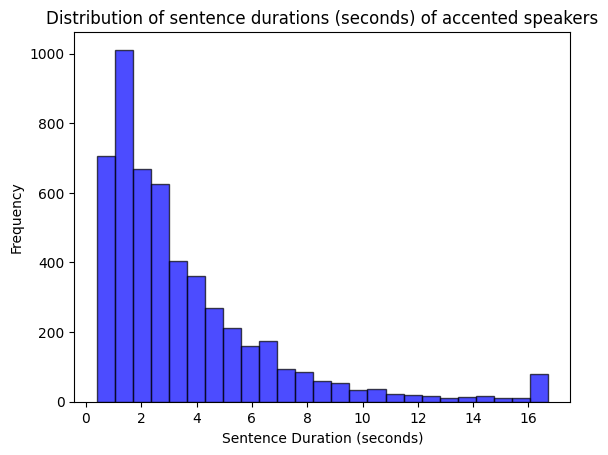

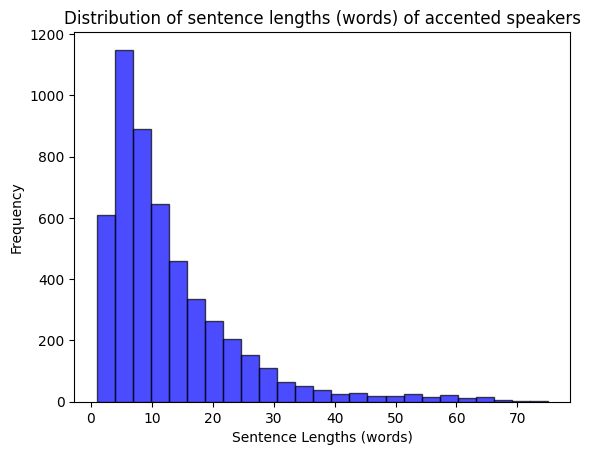

In [11]:
sentence_durations = accented_df['num_seconds'].to_numpy()
sentence_lengths = accented_df['num_words'].to_numpy()
print(f"Total Duration: {seconds_to_hhmmss(sentence_durations.sum())}")
print(f"Durations, Min: {sentence_durations.min()} | Max: {sentence_durations.max()} | Mean: {sentence_durations.mean()}")
print(f"Length, Min: {sentence_lengths.min()} | Max: {sentence_lengths.max()} | Mean: {sentence_lengths.mean()}")


# plt.style.use(['science', 'iee'])
plt.hist(sentence_durations, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of sentence durations (seconds) of accented speakers")
plt.xlabel('Sentence Duration (seconds)')
plt.ylabel('Frequency')
plt.show()

plt.hist(sentence_lengths, bins=25, color='b', edgecolor='black', alpha=0.7)
plt.title(f"Distribution of sentence lengths (words) of accented speakers")
plt.xlabel(f"Sentence Lengths (words)")
plt.ylabel(f"Frequency")
plt.show()

## Low Data Experiment Graphs

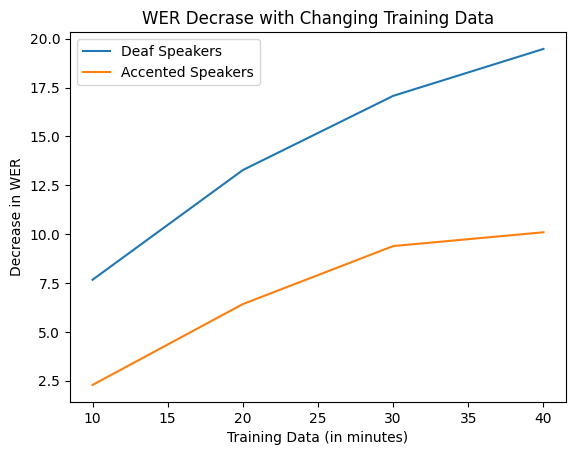

In [14]:
minutes = [10, 20, 30, 40]
deaf_wer_decrease = [7.66525, 13.28025, 17.07675, 19.4795]
accented_wer_decrease = [2.2816, 6.4196, 9.389, 10.0954]

plt.title('WER Decrase with Changing Training Data')
plt.plot(minutes, deaf_wer_decrease, label='Deaf Speakers')
plt.plot(minutes, accented_wer_decrease, label='Accented Speakers')
plt.xlabel('Training Data (in minutes)')
plt.ylabel('Decrease in WER')
plt.legend()

plt.show()